Dataset loaded. Shape: (569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perime

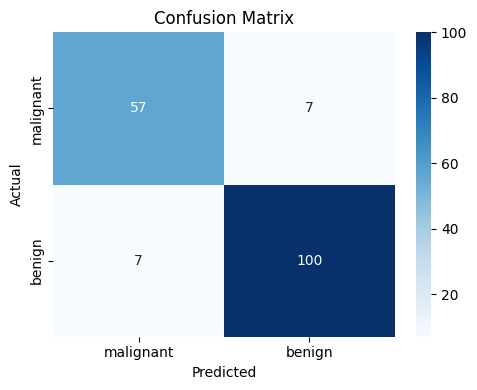

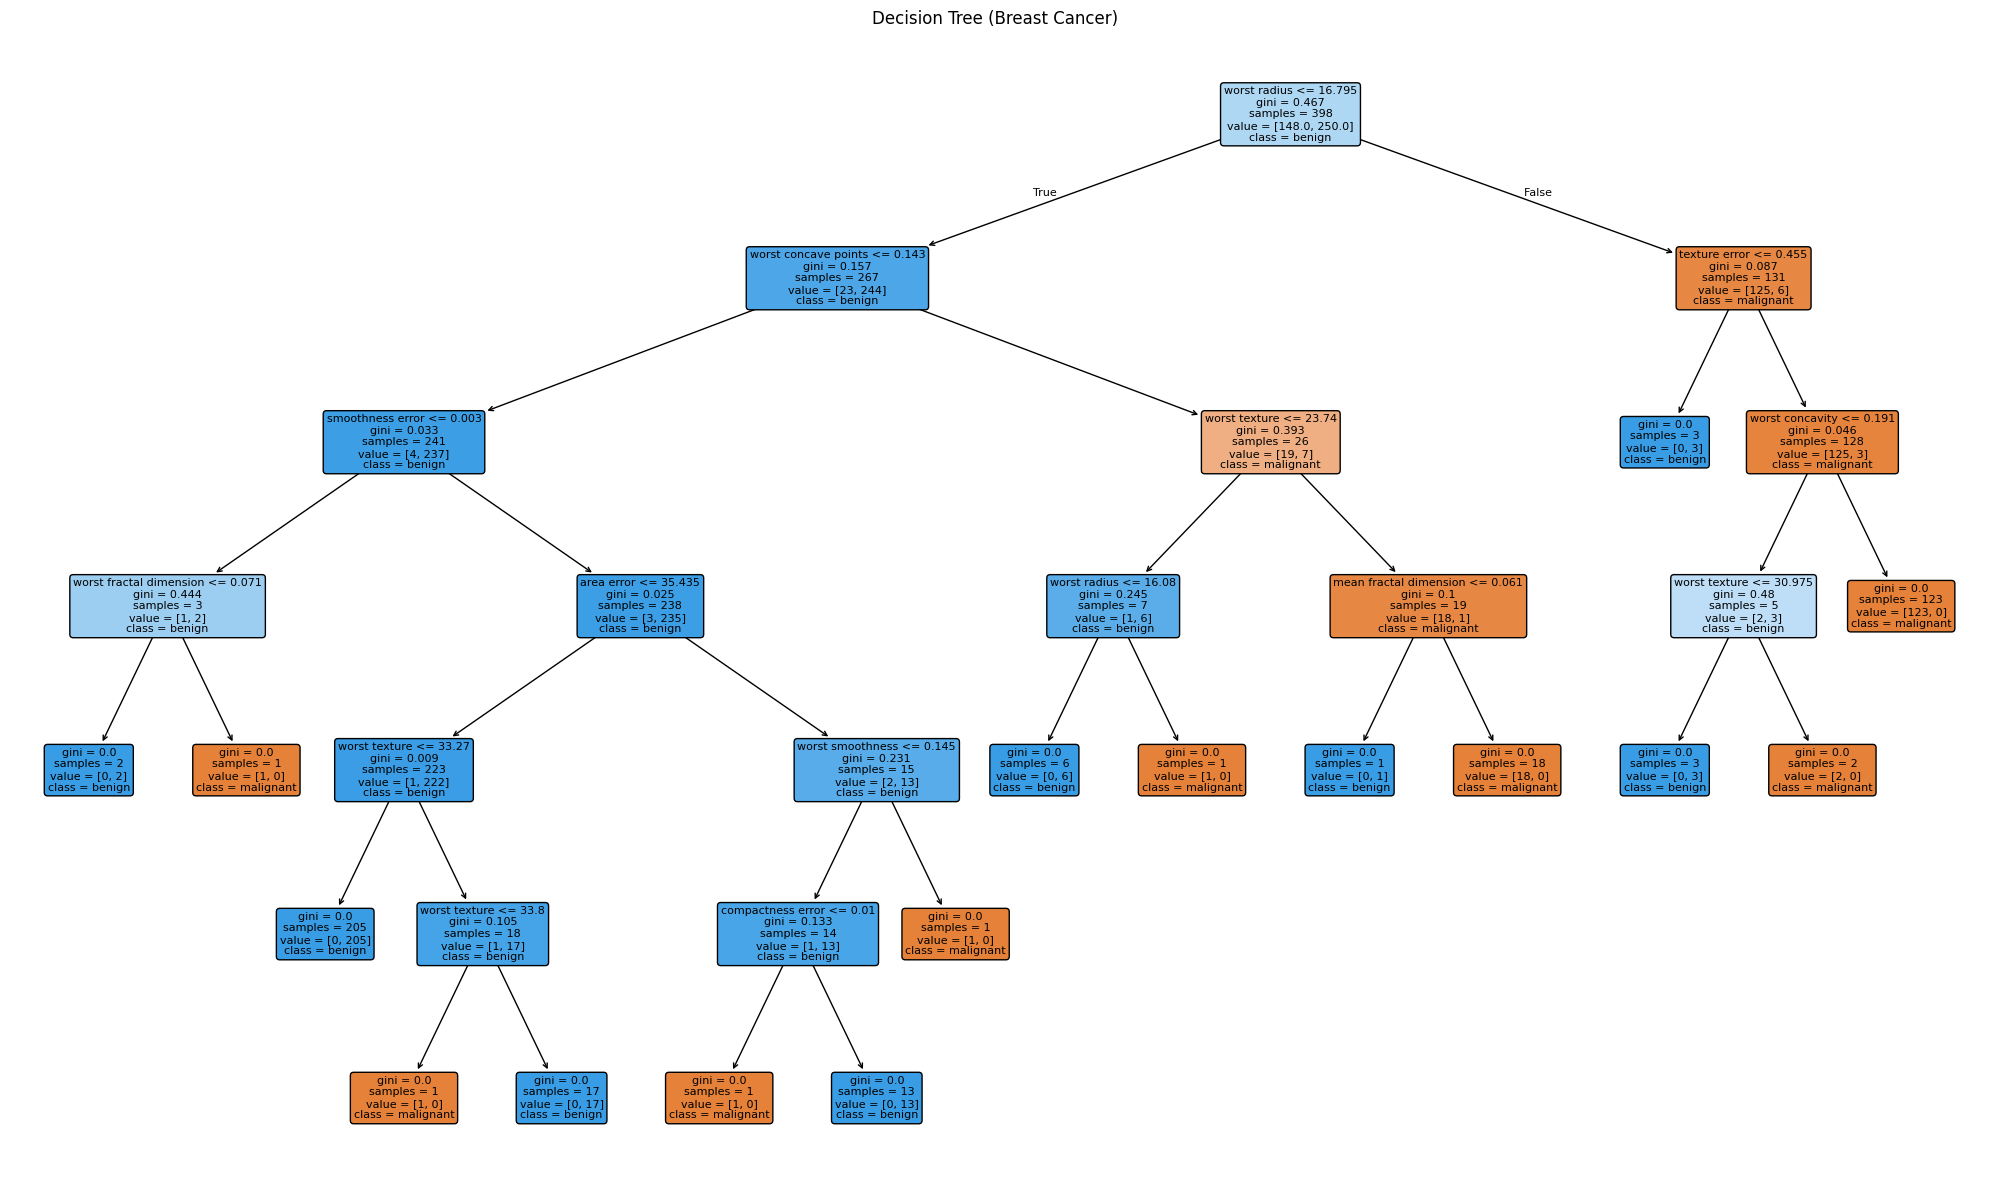


Decision tree diagram saved as 'decision_tree.png' in the working directory.


In [1]:
# =============================================================
# Ex No: 11  – Implementation of Decision Tree Classification
# (Breast Cancer Wisconsin Dataset)
# Google Colab Ready
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# 1. Load dataset
# -------------------------
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
class_names = cancer.target_names  # ['malignant', 'benign']

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset loaded. Shape:", df.shape)
print(df.head())

# -------------------------
# 2. Train / Test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

print("\nTrain samples:", X_train.shape[0])
print("Test samples: ", X_test.shape[0])

# -------------------------
# 3. Train Decision Tree
# -------------------------
# You can change max_depth, criterion, etc. for experimentation.
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42)
dt_model.fit(X_train, y_train)

# -------------------------
# 4. Predict & Evaluate
# -------------------------
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("\n==============================")
print("Decision Tree Evaluation")
print("==============================")
print("Accuracy:", round(accuracy, 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# -------------------------
# 5. Plot Confusion Matrix
# -------------------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# -------------------------
# 6. Plot Decision Tree Diagram
# -------------------------
plt.figure(figsize=(20,12))
plot_tree(
    dt_model,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (Breast Cancer)")
plt.tight_layout()
plt.savefig("decision_tree.png", dpi=300)  # saved to file in Colab environment
plt.show()

print("\nDecision tree diagram saved as 'decision_tree.png' in the working directory.")
